### Student Information
Name: 范瑞德 / Arridson Biraphath VERNEUS

Student ID: S1113548

GitHub ID: ArriSnnow

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

# Phase 1

**1) Data Source**

In [1]:
### Begin Assignment Here
# 1) Data Source
# Load Reddit Stock Sentiment CSV from the class repo
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(url)

df.shape, list(df.columns)


((847, 16),
 ['type',
  'datetime',
  'post_id',
  'subreddit',
  'title',
  'author',
  'url',
  'upvotes',
  'downvotes',
  'upvote_ratio',
  'text',
  'subjectivity',
  'polarity',
  'sentiment',
  'entities',
  'label'])

**2) Data Preparation**

In [2]:
# 2) Data Preparation
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(3)


Shape: (847, 16)
Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


3) Data Transformation
**bold text**
 3.1 Converting dictionary into Pandas dataframe **bold text**

In [3]:
sample_dict = {"ticker": ["AAPL","TSLA"], "body": ["buy the dip","sell calls"], "label": [1, 0]}
pd.DataFrame(sample_dict)

,ticker,body,label
0,AAPL,buy the dip,1
1,TSLA,sell calls,0


**3.2 Familiarizing with the Data**

In [4]:
print(df.info())
df.describe(include="all").T.head(12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
type,847,2,comment,783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
datetime,847,842,2025-04-11 14:30:53,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_id,847,847,mmobyz1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subreddit,847,4,stocks,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,847,127,Weekend Discussion Thread for the Weekend of A...,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,847,731,saasfin,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,847,151,https://www.reddit.com/r/wallstreetbets/commen...,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upvotes,847.0,NaN,NaN,NaN,12.262102,142.126337,-74.0,1.0,1.0,4.0,3943.0
downvotes,64.0,NaN,NaN,NaN,0.265625,1.461052,0.0,0.0,0.0,0.0,11.0
upvote_ratio,64.0,NaN,NaN,NaN,0.981406,0.068147,0.5,1.0,1.0,1.0,1.0


4) Data Mining using Pandas — 4.1 Dealing with Missing Values

4.2 Dealing with Duplicate Data

In [6]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)
df = df.drop_duplicates().reset_index(drop=True)
print("Shape after drop_duplicates:", df.shape)

Duplicate rows: 0
Shape after drop_duplicates: (847, 16)


5) Data Preprocessing — 5.1 Sampling

In [7]:
X_sample = df.sample(n=min(1000, len(df)), random_state=42).reset_index(drop=True)
len(X_sample), X_sample.head(3)

(847,
       type             datetime  post_id       subreddit  \
 0  comment  2025-04-11 15:42:58  mmkwda9     StockMarket   
 1  comment   2025-04-12 3:04:05  mmob98a  wallstreetbets   
 2  comment  2025-04-10 14:40:26  mme8wxn     StockMarket   
 
                                                title              author  \
 0  Trump: We Are Doing Really Well On Our Tariff ...  IamNotaMonkeyRobot   
 1  Retail giant TARGET has now declined for 10 co...    iPlayedHockeInHS   
 2  How do you feel about a sitting president maki...         Narradisall   
 
                                                  url  upvotes  downvotes  \
 0                https://i.redd.it/uajqu4kxl7ue1.png        1        NaN   
 1               https://i.redd.it/7tl6puv9waue1.jpeg        1        NaN   
 2  https://apnews.com/article/trump-truth-social-...        2        NaN   
 
    upvote_ratio            text  subjectivity  polarity  sentiment  \
 0           NaN       "We" who?          0.00       0.0 

5.2 Feature Creation

In [10]:
X_sample["text_length"] = X_sample["text"].astype(str).str.len()
X_sample["mention_buy"] = X_sample["text"].str.contains(r"\bbuy\b", case=False, na=False).astype(int)
X_sample["mention_sell"] = X_sample["text"].str.contains(r"\bsell\b", case=False, na=False).astype(int)

X_sample[["text","label","text_length","mention_buy","mention_sell"]].head(5)

,text,label,text_length,mention_buy,mention_sell
0,"""We"" who?",0.0,9,0,0
1,Chicken jockey,0.0,14,0,0
2,Not great Bob,-1.0,13,0,0
3,"Speak for yourself, my wife is being harder on...",0.0,257,0,0
4,Where can I read this?,0.0,22,0,0


5.3 Feature Subset Selection

In [12]:
keep_cols = ["text","label","text_length","mention_buy","mention_sell"]
X = X_sample[keep_cols].copy()
X.head(3)

,text,label,text_length,mention_buy,mention_sell
0,"""We"" who?",0.0,9,0,0
1,Chicken jockey,0.0,14,0,0
2,Not great Bob,-1.0,13,0,0


5.4 Attribute Transformation / Aggregation

In [39]:
# Aggregate per ticker (top 10)
# 5.4 Attribute Transformation / Aggregation  — per "ticker" extracted from `entities`

import ast
import pandas as pd

def extract_tickers(entities_cell):
    """
    Parse the `entities` cell and return a list of potential tickers:
    uppercase tokens with length <= 5.
    """
    if isinstance(entities_cell, str):
        try:
            entities = ast.literal_eval(entities_cell)
        except (ValueError, SyntaxError):
            return []
    elif isinstance(entities_cell, list):
        entities = entities_cell
    else:
        return []
    return [e for e in entities if isinstance(e, str) and e.isupper() and len(e) <= 5]

# If your sample does not yet include 'entities', attach it from the original df by index
if "entities" not in X_sample.columns and "entities" in df.columns:
    X_sample = X_sample.join(df["entities"], how="left")

# Build a list of tickers per row, then explode to get one row per (post, ticker)
X_sample = X_sample.copy()
X_sample["ticker"] = X_sample["entities"].apply(extract_tickers)
X_exp = (X_sample
         .explode("ticker")
         .dropna(subset=["ticker"]))

# Aggregate per extracted ticker (top 10)
agg = (X_exp
       .groupby("ticker", as_index=False)
       .agg(n_posts=("text","count"),
            avg_len=("text_length","mean"),
            pct_buy=("mention_buy","mean"),
            pct_sell=("mention_sell","mean"))
       .sort_values("n_posts", ascending=False)
       .head(10))

agg


,ticker,n_posts,avg_len,pct_buy,pct_sell
252,US,54,416.814815,0.092593,0.055556
248,U.S.,11,504.272727,0.000000,0.090909
232,SPY,11,377.636364,0.000000,0.000000
253,USA,10,551.900000,0.100000,0.000000
254,USD,9,288.000000,0.000000,0.000000
216,S,7,565.285714,0.000000,0.000000
194,P,7,565.285714,0.000000,0.000000
163,MAGA,6,187.000000,0.000000,0.000000
115,GME,6,221.000000,0.166667,0.166667
217,S&P,5,617.600000,0.000000,0.000000


<Figure size 1000x400 with 0 Axes>

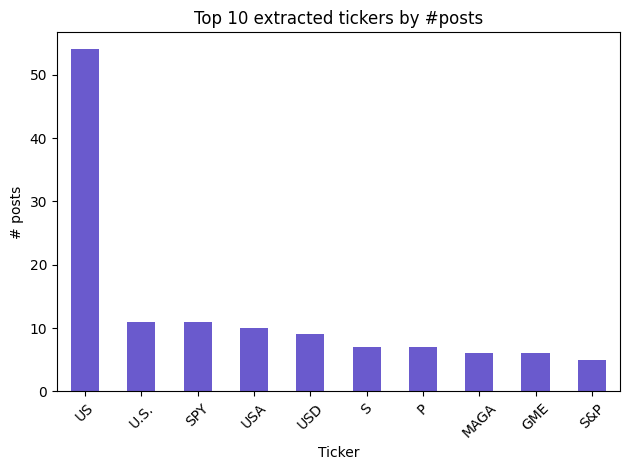

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
agg.plot(x="ticker", y="n_posts", kind="bar", legend=False, color="slateblue")
plt.title("Top 10 extracted tickers by #posts")
plt.xlabel("Ticker"); plt.ylabel("# posts")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


5.4.1 Transform Text Data

In [16]:
import re

def clean_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"http\S+", " ", s)           # remove URLs
    s = re.sub(r"[^a-z\s]", " ", s)          # keep letters/spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

X["clean_text"] = X["text"].astype(str).apply(clean_text)
X[["text","clean_text"]].head(3)

,text,clean_text
0,"""We"" who?",we who
1,Chicken jockey,chicken jockey
2,Not great Bob,not great bob


tiny sanity plots

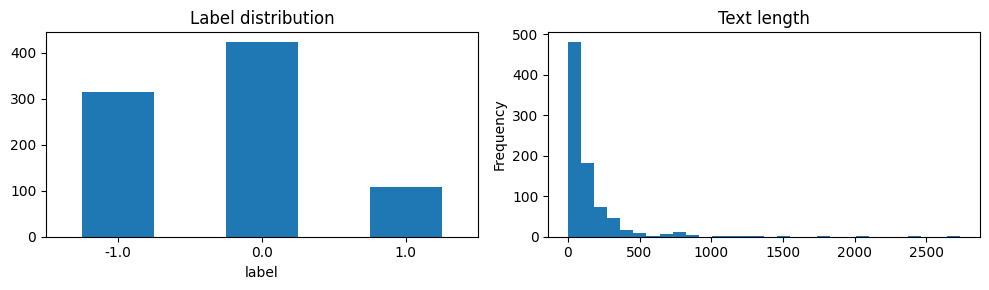

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10,3))
X["label"].value_counts().sort_index().plot(kind="bar", ax=axes[0], title="Label distribution", rot=0)
X["text_length"].plot(kind="hist", ax=axes[1], bins=30, title="Text length")
plt.tight_layout(); plt.show()

Build a Term–Document Matrix (CountVectorizer) (+ sparsity)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words="english")  # simple
X_counts = cv.fit_transform(X["clean_text"])

print("TDM shape (docs, terms):", X_counts.shape)

# Sparsity (% of zeros)
nnz = X_counts.count_nonzero()
total = X_counts.shape[0] * X_counts.shape[1]
sparsity_pct = 100 * (1 - nnz/total)
print("Sparsity (% zeros):", round(sparsity_pct, 4))

TDM shape (docs, terms): (847, 3933)
Sparsity (% zeros): 99.7115


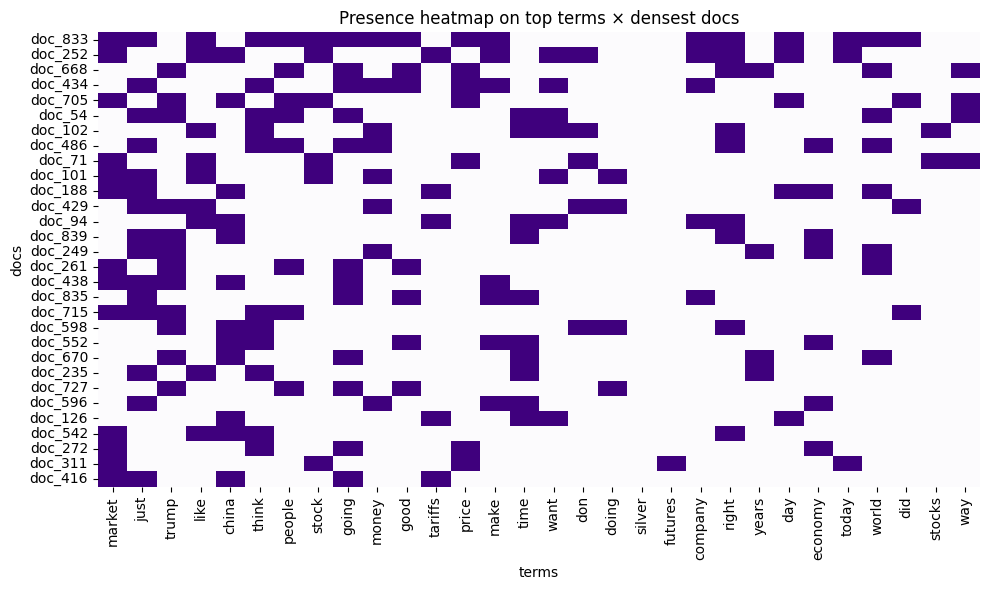

In [41]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# 1) choose top-K frequent terms
K = 30
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
top_cols = term_freq.argsort()[::-1][:K]

# 2) pick densest documents
block = (X_counts[:, top_cols] > 0).astype(int)
row_nnz = np.asarray(block.sum(axis=1)).ravel()
rows = row_nnz.argsort()[::-1][:30]

# 3) dataframe for heatmap
tdm_df = pd.DataFrame(
    block[rows].toarray(),
    index=[f"doc_{int(i)}" for i in rows],
    columns=cv.get_feature_names_out()[top_cols]
)

plt.figure(figsize=(10,6))
sns.heatmap(tdm_df, cmap="Purples", cbar=False)
plt.title("Presence heatmap on top terms × densest docs")
plt.xlabel("terms"); plt.ylabel("docs")
plt.tight_layout(); plt.show()

Top-N most frequent terms (limited chart, simple)

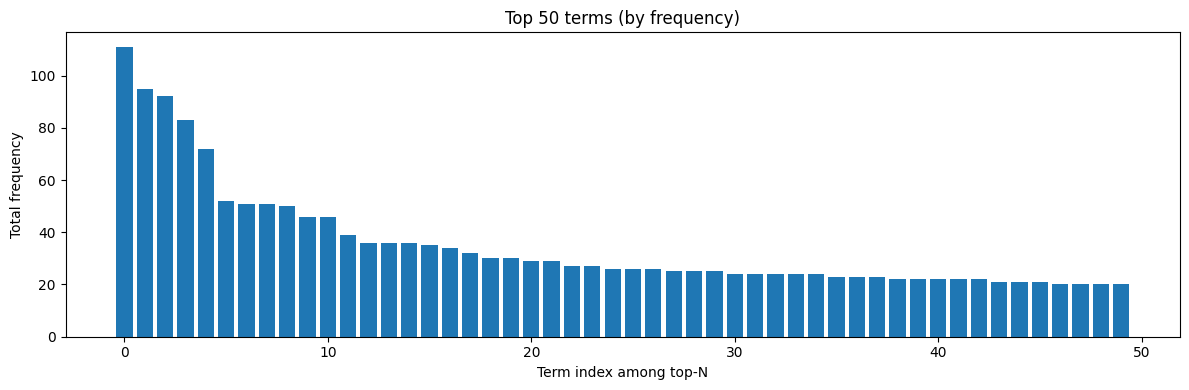

In [20]:
import numpy as np
import matplotlib.pyplot as plt

term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
vocab = cv.get_feature_names_out()

N = 50  # small for readability
top_idx = term_freq.argsort()[::-1][:N]

plt.figure(figsize=(12,4))
plt.bar(range(N), term_freq[top_idx])
plt.title(f"Top {N} terms (by frequency)")
plt.xlabel("Term index among top-N"); plt.ylabel("Total frequency")
plt.tight_layout(); plt.show()

Sort by frequency and show the long tail

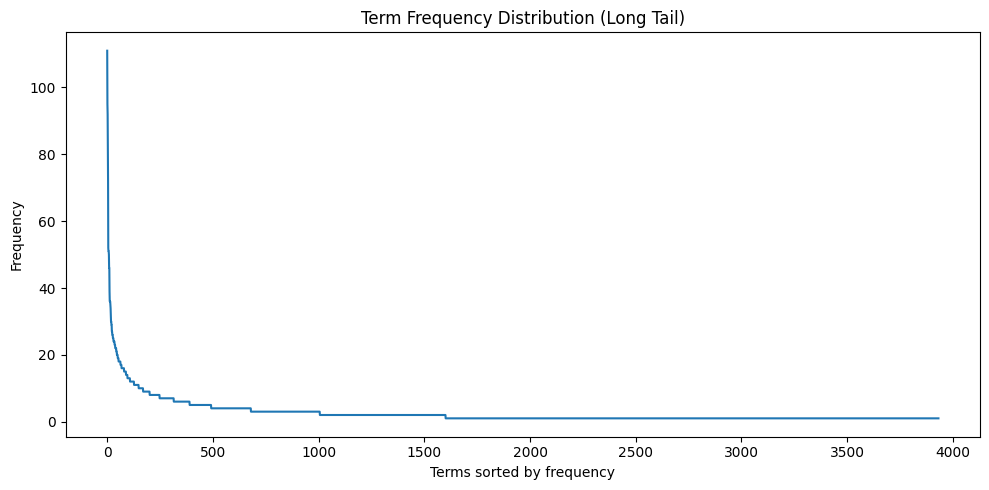

In [21]:
order = term_freq.argsort()[::-1]  # descending
plt.figure(figsize=(10,5))
plt.plot(term_freq[order])
plt.title("Term Frequency Distribution (Long Tail)")
plt.xlabel("Terms sorted by frequency"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()

Log-scaled frequency curve + observation

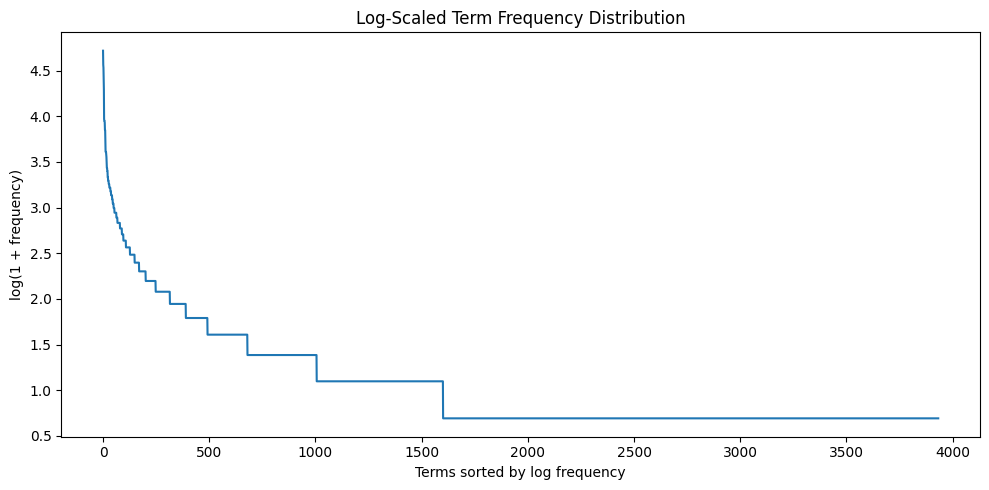

In [22]:
term_freq_log = np.log1p(term_freq)  # stable when freq=0
order_log = term_freq_log.argsort()[::-1]

plt.figure(figsize=(10,5))
plt.plot(term_freq_log[order_log])
plt.title("Log-Scaled Term Frequency Distribution")
plt.xlabel("Terms sorted by log frequency"); plt.ylabel("log(1 + frequency)")
plt.tight_layout(); plt.show()

## Phase 1 — Extended: Exploratory Visualizations

Visualization 1 – Sentiment Distribution

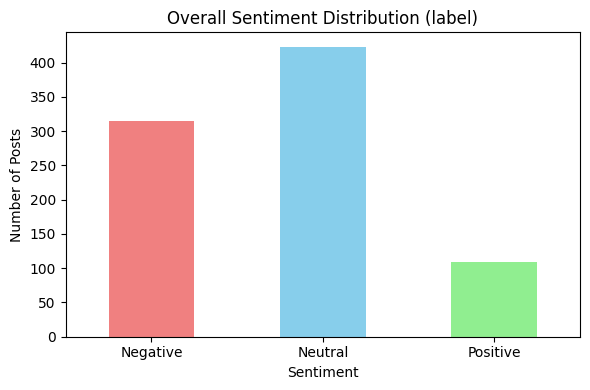

In [32]:
## Visualization 1 – Sentiment Distribution  (uses 'label': -1=neg, 0=neutral, 1=pos)

import matplotlib.pyplot as plt

label_names = {-1.0: "Negative", 0.0: "Neutral", 1.0: "Positive"}
vc = df["label"].value_counts().sort_index()
plt.figure(figsize=(6,4))
vc.plot(kind="bar", color=["lightcoral","skyblue","lightgreen"])
plt.xticks(ticks=range(len(vc.index)),
           labels=[label_names.get(float(x), str(x)) for x in vc.index],
           rotation=0)
plt.title("Overall Sentiment Distribution (label)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout(); plt.show()

Visualization 2 – Most Mentioned Stocks

/tmp/ipython-input-1486039274.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Count', data=top_tickers_df, palette='viridis')


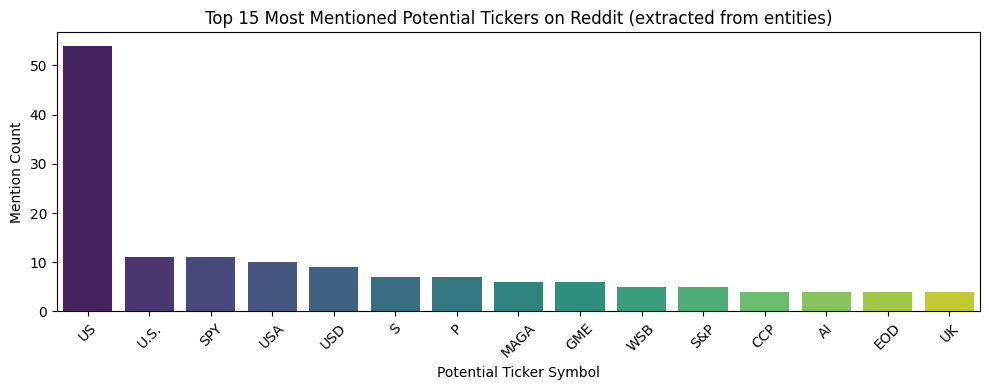

In [42]:
# Visualization 2 – Top 15 Potential Tickers Mentioned in Reddit Posts
# Extracted from 'entities'

import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def extract_tickers(entities_list):
    """Extract uppercase strings (≤5 chars) from the 'entities' list as potential tickers."""
    if isinstance(entities_list, str):
        try:
            entities_list = ast.literal_eval(entities_list)
        except (ValueError, SyntaxError):
            return []
    if isinstance(entities_list, list):
        return [e for e in entities_list if isinstance(e, str) and e.isupper() and len(e) <= 5]
    return []

# Flatten list of tickers across all posts
all_entities = df['entities'].apply(extract_tickers).sum()
ticker_counts = Counter(all_entities)

# Convert to DataFrame for plotting
top_tickers = ticker_counts.most_common(15)
top_tickers_df = pd.DataFrame(top_tickers, columns=['Ticker', 'Count'])

plt.figure(figsize=(10,4))
sns.barplot(x='Ticker', y='Count', data=top_tickers_df, palette='viridis')
plt.title("Top 15 Most Mentioned Potential Tickers on Reddit (extracted from entities)")
plt.xlabel("Potential Ticker Symbol")
plt.ylabel("Mention Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualization 3 – Average Sentiment per Stock

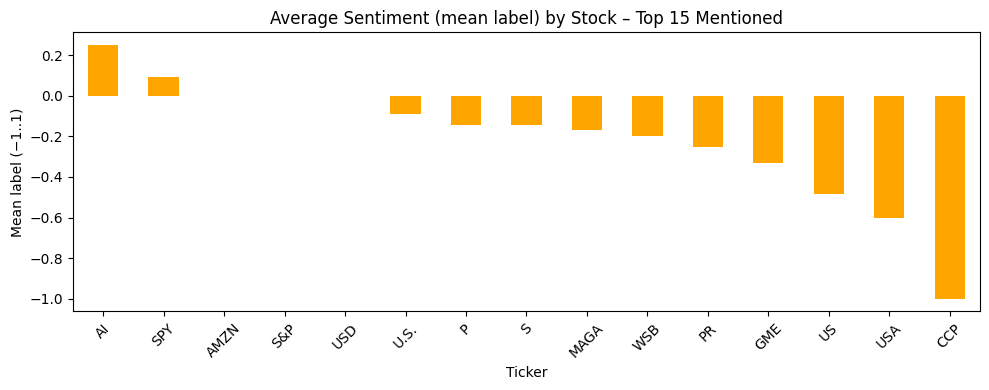

In [43]:
# Average sentiment polarity by stock (requires numeric sentiment score)
import ast
import pandas as pd
import matplotlib.pyplot as plt

def extract_tickers(entities_cell):
    if isinstance(entities_cell, str):
        try:
            entities = ast.literal_eval(entities_cell)
        except (ValueError, SyntaxError):
            return []
    elif isinstance(entities_cell, list):
        entities = entities_cell
    else:
        return []
    return [e for e in entities if isinstance(e, str) and e.isupper() and len(e) <= 5]

tmp = df[['entities','label']].copy()
tmp['ticker'] = tmp['entities'].apply(extract_tickers)
tmp = tmp.explode('ticker').dropna(subset=['ticker'])

# pick top 15 by mention count
top15 = tmp['ticker'].value_counts().head(15).index

avg = (tmp[tmp['ticker'].isin(top15)]
       .groupby('ticker')['label']
       .mean()
       .sort_values(ascending=False))

plt.figure(figsize=(10,4))
avg.plot(kind='bar', color='orange')
plt.title("Average Sentiment (mean label) by Stock – Top 15 Mentioned")
plt.xlabel("Ticker"); plt.ylabel("Mean label (−1..1)")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here